In [1]:
import numpy as np
from matplotlib import pyplot as plt
from NeuralNetwork import NeuralNetwork
from utils import get_data, onehot_encoding, grid_search, save_dict_to_file, load_dict_from_file
from Layer import Layer, Input
from functions import accuracy, MSE, MEE
import pandas as pd

In [2]:
best_comb_filename = '/Users/HP/Desktop/UNI/LM_1/MachineLearning/ML_prj/data/output/best_comb_cup2.pkl'
param_grid_filename = '/Users/HP/Desktop/UNI/LM_1/MachineLearning/ML_prj/data/output/param_grid_cup2.pkl'

In [3]:
names = ['id', 'feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5', 'feature_6', 
         'feature_7', 'feature_8', 'feature_9', 'feature_10', 'target_x', 'target_y','target_z']

df = pd.read_csv('/Users/HP/Desktop/UNI/LM_1/MachineLearning/ML_prj/data/ML-CUP23-TR.csv', names=names, comment='#')

targets = ['target_x', 'target_y', 'target_z']
features = list(set(names) - {'id', 'target_x', 'target_y', 'target_z'})

df = df.sample(frac=1)
prova = df[:750]
X_train, y_train = prova[features].to_numpy().T, prova[targets].to_numpy().T
X_test, y_test = df[750:][features].to_numpy().T, df[750:][targets].to_numpy().T

In [4]:
best_comb = load_dict_from_file(best_comb_filename)
param_grid = load_dict_from_file(param_grid_filename)

In [5]:
# Print the best {how_many} hyperparameter sets by their {sorting_key}

how_many = 5 # how many elements to print
sorting_key = 'val_loss_mean' # value on which the sorting is performed
p_best = []

p_to_sort = [[x, x['results'][sorting_key]] for x in param_grid]
p_best_sorted = sorted(p_to_sort, key=lambda x:x[1])

for p_comb,loss in p_best_sorted[:how_many]:
    p_best.append(p_comb)
    tmp_dict = p_comb.copy()
    results = tmp_dict.pop('results')
    print(f"val_loss = {results['val_loss_mean']:.2e} +- {results['val_loss_std']:.2e}")
    print(f'hyperparameters : {tmp_dict}')
    print(f'results : {results}')
    print('')

val_loss = 2.36e+00 +- 4.95e-01
hyperparameters : {'eta': 0.1, 'lam': 0.01, 'alpha': 0.5, 'epochs': 250, 'n_batch': 128, 'scale_eta_batchsize': None, 'dim_hidden': 15, 'hidden_act_func': 'sigm', 'dim_hidden2': 15, 'hidden_act_func2': 'sigm', 'dim_hidden3': 10, 'hidden_act_func3': 'sigm', 'use_opt': 0, 'loss': 'MSE', 'output_act_func': 'lin', 'elapsed_time': 265.4940359592438}
results : {'train_loss_mean': 1.889254484416893, 'train_loss_std': 0.2600875991652729, 'val_loss_mean': 2.3645878351899077, 'val_loss_std': 0.49498875093714506, 'train_MEE_mean': 1.901109279060158, 'train_MEE_std': 0.15974509612638052, 'val_MEE_mean': 2.1395576927036144, 'val_MEE_std': 0.204197386928979}

val_loss = 2.67e+00 +- 8.06e-01
hyperparameters : {'eta': 0.1, 'lam': 0.01, 'alpha': 0.9, 'epochs': 250, 'n_batch': 128, 'scale_eta_batchsize': None, 'dim_hidden': 15, 'hidden_act_func': 'sigm', 'dim_hidden2': 15, 'hidden_act_func2': 'sigm', 'dim_hidden3': 10, 'hidden_act_func3': 'sigm', 'use_opt': 0, 'loss': 'MS

Epoch 0: train_loss: 7.034e+02, test_loss: 7.298e+02; train_MEE: 4.122e+01, test_MEE: 4.234e+01  lr : 0.1
Epoch 1: train_loss: 5.946e+02, test_loss: 6.245e+02; train_MEE: 3.876e+01, test_MEE: 4.006e+01  lr : 0.1
Epoch 2: train_loss: 5.586e+02, test_loss: 5.752e+02; train_MEE: 3.864e+01, test_MEE: 3.941e+01  lr : 0.1
Epoch 3: train_loss: 5.424e+02, test_loss: 5.609e+02; train_MEE: 3.869e+01, test_MEE: 3.950e+01  lr : 0.1
Epoch 4: train_loss: 5.494e+02, test_loss: 5.596e+02; train_MEE: 3.916e+01, test_MEE: 3.964e+01  lr : 0.1
Epoch 5: train_loss: 5.492e+02, test_loss: 5.541e+02; train_MEE: 3.914e+01, test_MEE: 3.940e+01  lr : 0.1
Epoch 6: train_loss: 5.381e+02, test_loss: 5.418e+02; train_MEE: 3.853e+01, test_MEE: 3.878e+01  lr : 0.1
Epoch 7: train_loss: 5.237e+02, test_loss: 5.285e+02; train_MEE: 3.780e+01, test_MEE: 3.809e+01  lr : 0.1
Epoch 8: train_loss: 5.071e+02, test_loss: 5.156e+02; train_MEE: 3.691e+01, test_MEE: 3.741e+01  lr : 0.1
Epoch 9: train_loss: 4.938e+02, test_loss: 5.0

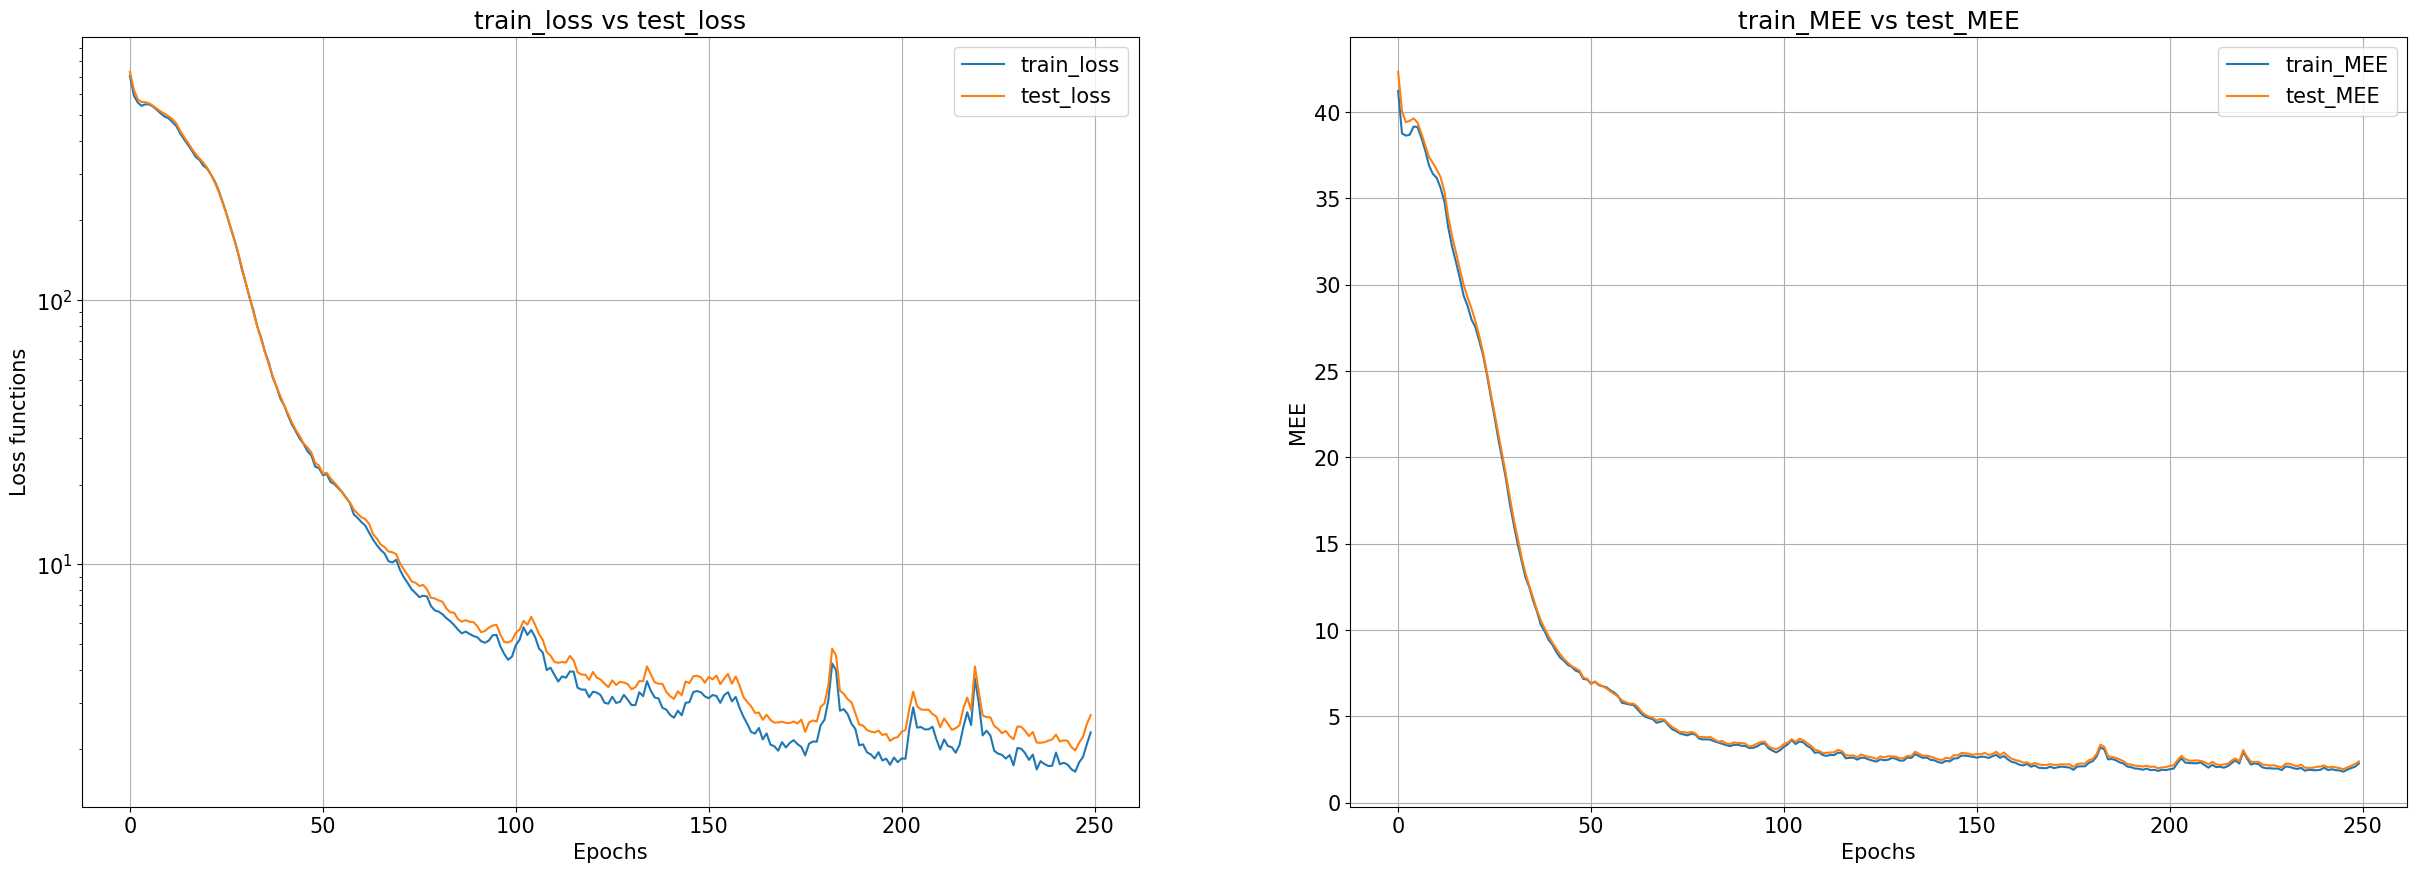

Epoch 0: train_loss: 7.087e+02, test_loss: 7.290e+02; train_MEE: 4.144e+01, test_MEE: 4.243e+01  lr : 0.1
Epoch 1: train_loss: 5.968e+02, test_loss: 6.265e+02; train_MEE: 3.901e+01, test_MEE: 4.033e+01  lr : 0.1
Epoch 2: train_loss: 5.554e+02, test_loss: 5.772e+02; train_MEE: 3.860e+01, test_MEE: 3.964e+01  lr : 0.1
Epoch 3: train_loss: 5.464e+02, test_loss: 5.625e+02; train_MEE: 3.893e+01, test_MEE: 3.963e+01  lr : 0.1
Epoch 4: train_loss: 5.524e+02, test_loss: 5.590e+02; train_MEE: 3.927e+01, test_MEE: 3.962e+01  lr : 0.1
Epoch 5: train_loss: 5.481e+02, test_loss: 5.568e+02; train_MEE: 3.904e+01, test_MEE: 3.945e+01  lr : 0.1
Epoch 6: train_loss: 5.482e+02, test_loss: 5.545e+02; train_MEE: 3.884e+01, test_MEE: 3.917e+01  lr : 0.1
Epoch 7: train_loss: 5.432e+02, test_loss: 5.544e+02; train_MEE: 3.849e+01, test_MEE: 3.901e+01  lr : 0.1
Epoch 8: train_loss: 5.480e+02, test_loss: 5.565e+02; train_MEE: 3.851e+01, test_MEE: 3.899e+01  lr : 0.1
Epoch 9: train_loss: 5.491e+02, test_loss: 5.5

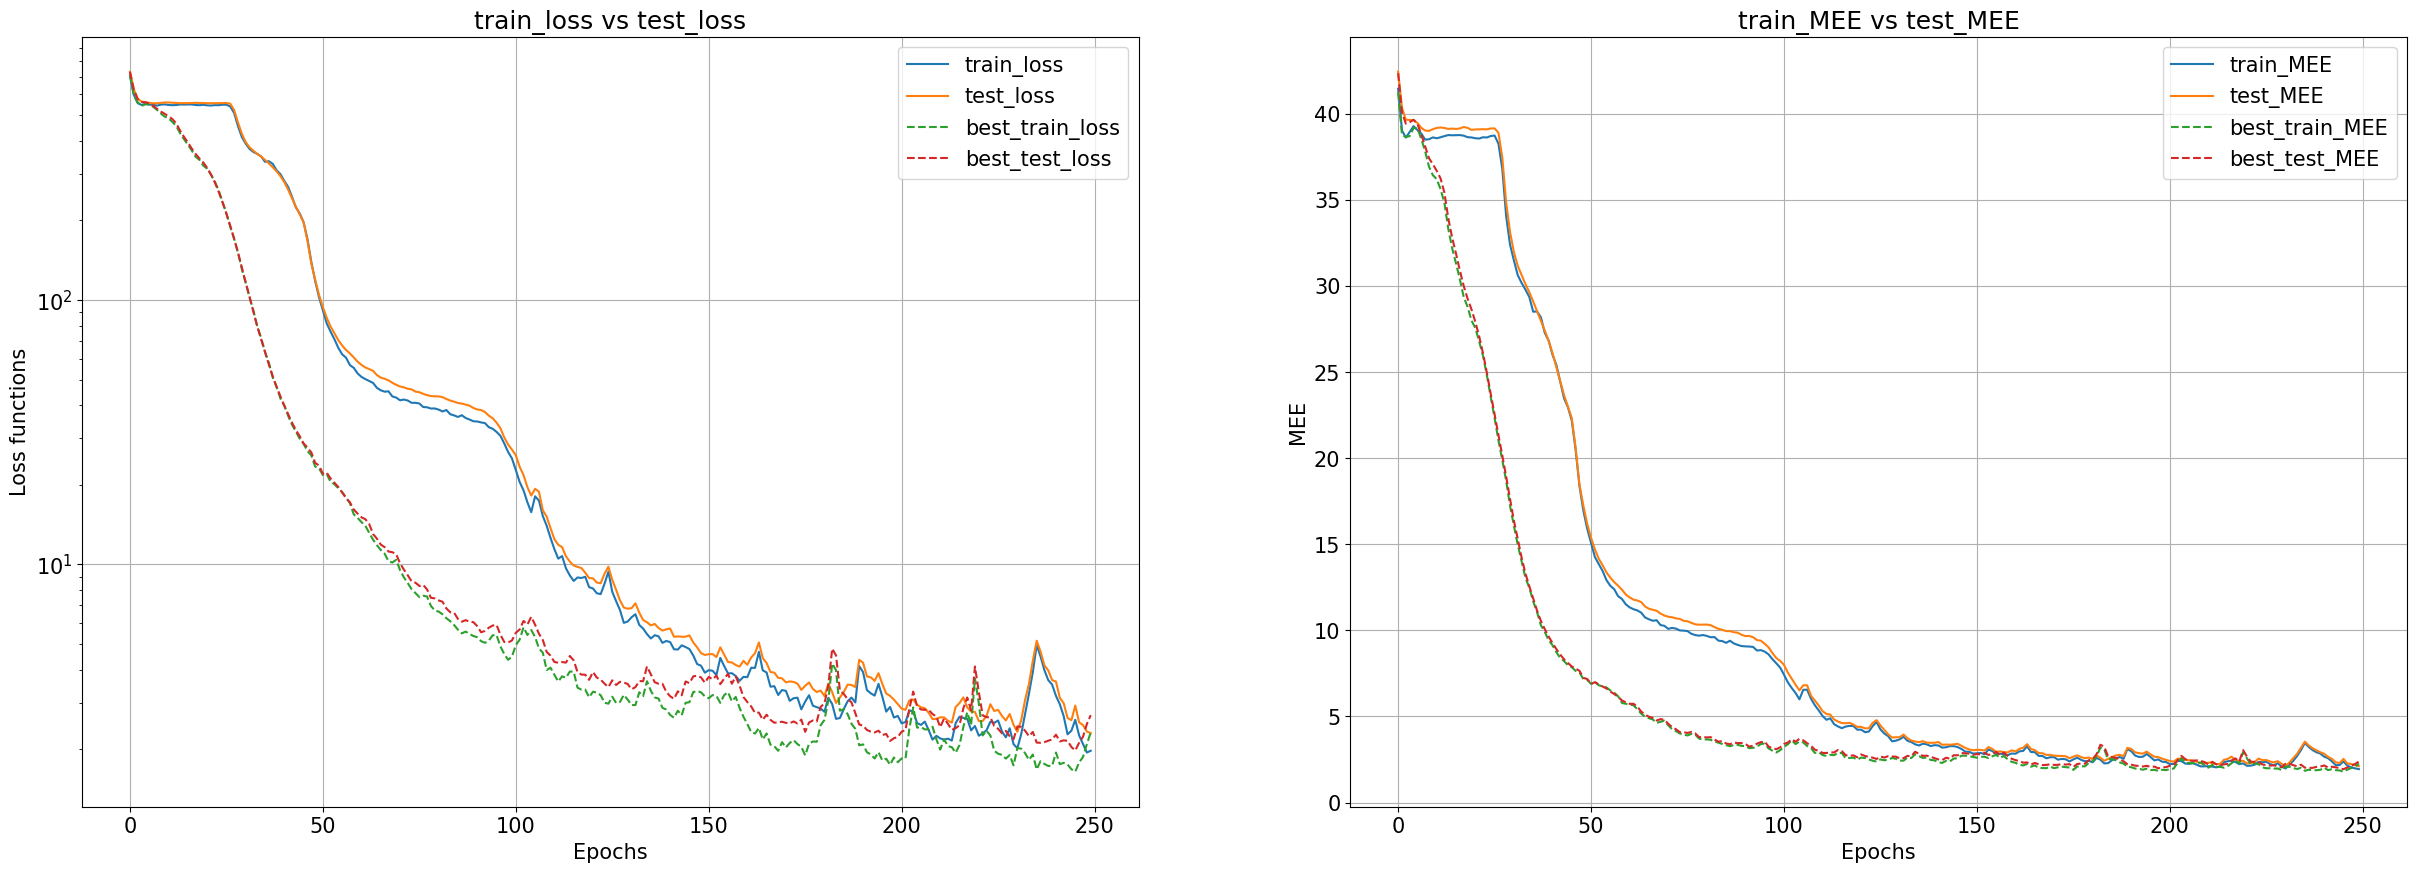

Epoch 0: train_loss: 7.163e+02, test_loss: 7.366e+02; train_MEE: 4.136e+01, test_MEE: 4.236e+01  lr : 0.1
Epoch 1: train_loss: 6.186e+02, test_loss: 6.417e+02; train_MEE: 3.914e+01, test_MEE: 4.021e+01  lr : 0.1
Epoch 2: train_loss: 5.585e+02, test_loss: 5.740e+02; train_MEE: 3.832e+01, test_MEE: 3.908e+01  lr : 0.1
Epoch 3: train_loss: 5.465e+02, test_loss: 5.572e+02; train_MEE: 3.883e+01, test_MEE: 3.932e+01  lr : 0.1
Epoch 4: train_loss: 5.415e+02, test_loss: 5.519e+02; train_MEE: 3.887e+01, test_MEE: 3.936e+01  lr : 0.1
Epoch 5: train_loss: 5.241e+02, test_loss: 5.298e+02; train_MEE: 3.809e+01, test_MEE: 3.842e+01  lr : 0.1
Epoch 6: train_loss: 4.873e+02, test_loss: 4.924e+02; train_MEE: 3.626e+01, test_MEE: 3.663e+01  lr : 0.1
Epoch 7: train_loss: 4.450e+02, test_loss: 4.497e+02; train_MEE: 3.411e+01, test_MEE: 3.456e+01  lr : 0.1
Epoch 8: train_loss: 4.143e+02, test_loss: 4.198e+02; train_MEE: 3.261e+01, test_MEE: 3.314e+01  lr : 0.1
Epoch 9: train_loss: 3.878e+02, test_loss: 3.9

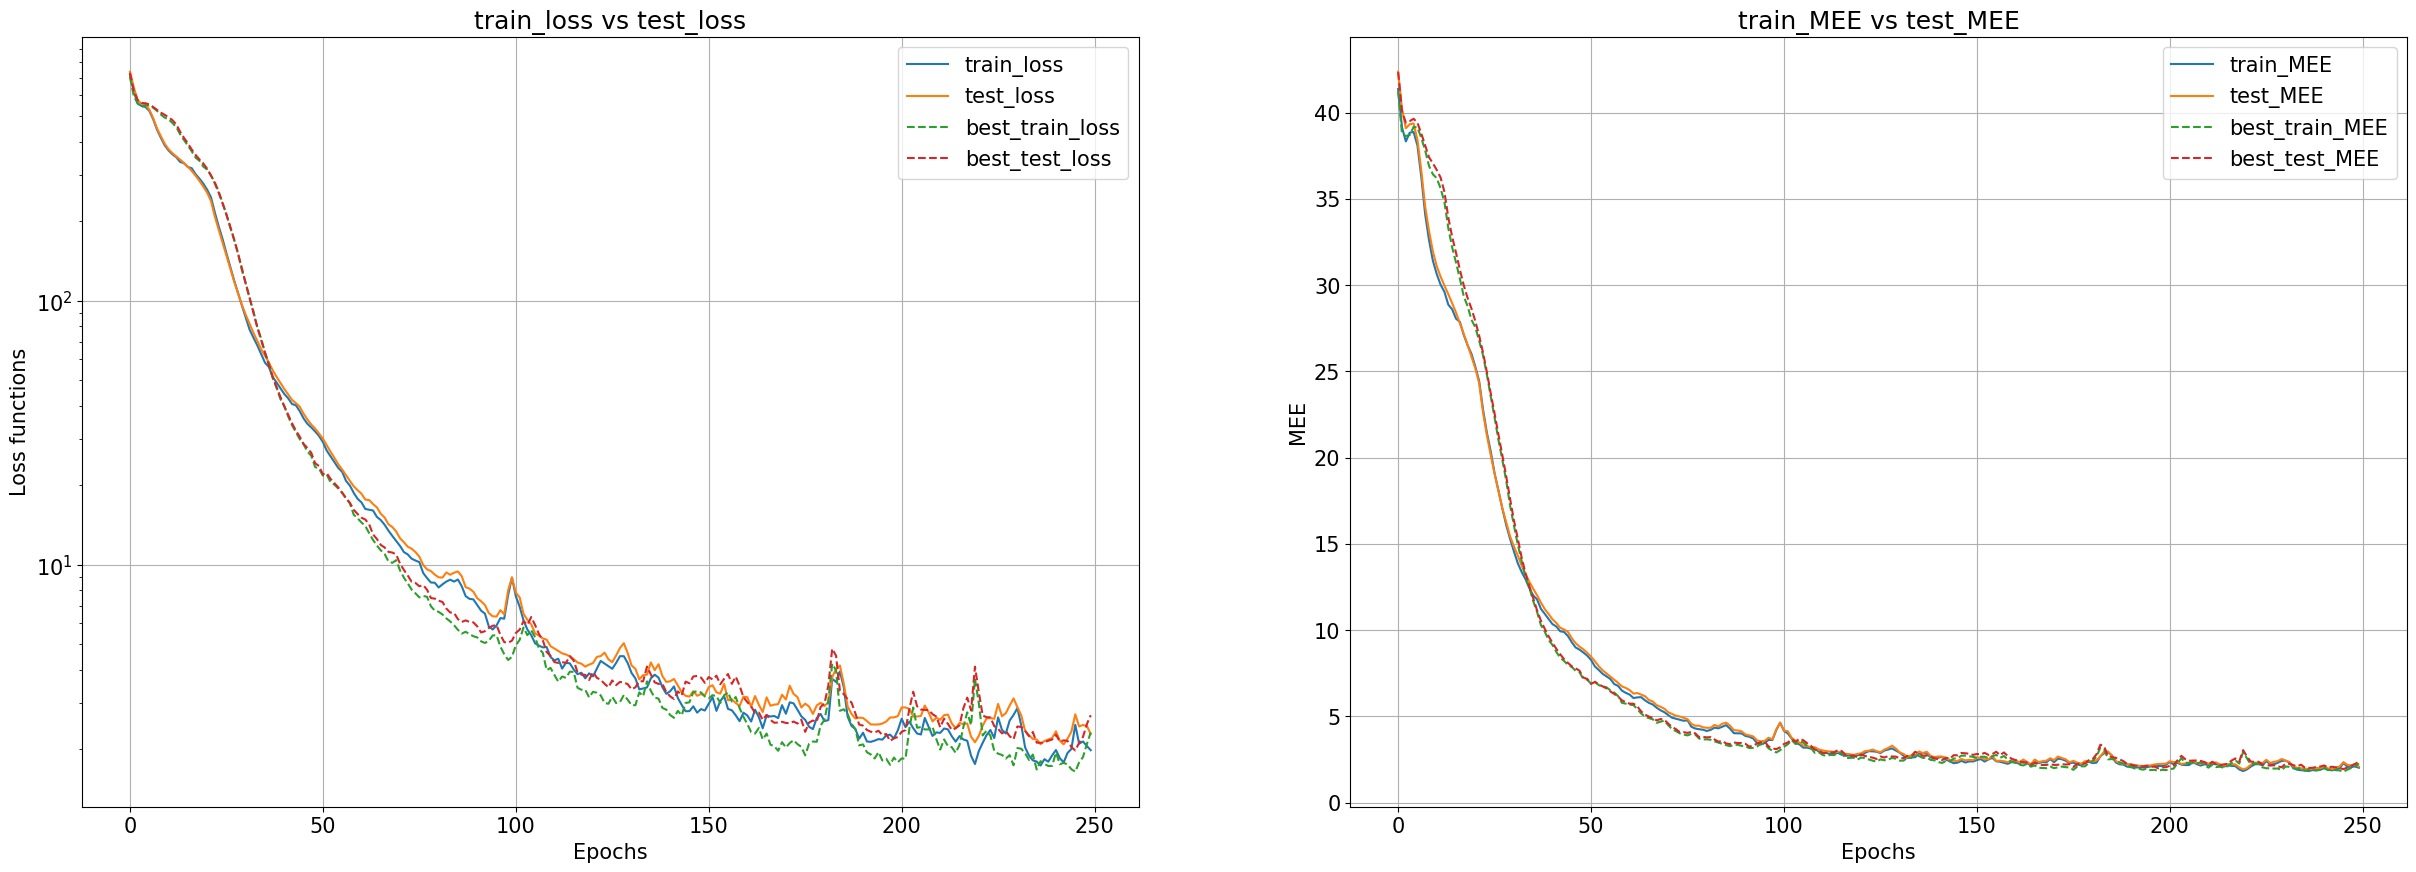

Epoch 0: train_loss: 7.214e+02, test_loss: 7.474e+02; train_MEE: 4.157e+01, test_MEE: 4.268e+01  lr : 0.1
Epoch 1: train_loss: 6.155e+02, test_loss: 6.383e+02; train_MEE: 3.920e+01, test_MEE: 4.025e+01  lr : 0.1
Epoch 2: train_loss: 5.581e+02, test_loss: 5.782e+02; train_MEE: 3.852e+01, test_MEE: 3.946e+01  lr : 0.1
Epoch 3: train_loss: 5.424e+02, test_loss: 5.597e+02; train_MEE: 3.868e+01, test_MEE: 3.945e+01  lr : 0.1
Epoch 4: train_loss: 5.319e+02, test_loss: 5.450e+02; train_MEE: 3.838e+01, test_MEE: 3.897e+01  lr : 0.1
Epoch 5: train_loss: 5.154e+02, test_loss: 5.194e+02; train_MEE: 3.760e+01, test_MEE: 3.788e+01  lr : 0.1
Epoch 6: train_loss: 4.705e+02, test_loss: 4.773e+02; train_MEE: 3.534e+01, test_MEE: 3.575e+01  lr : 0.1
Epoch 7: train_loss: 4.384e+02, test_loss: 4.501e+02; train_MEE: 3.381e+01, test_MEE: 3.450e+01  lr : 0.1
Epoch 8: train_loss: 4.197e+02, test_loss: 4.259e+02; train_MEE: 3.303e+01, test_MEE: 3.351e+01  lr : 0.1
Epoch 9: train_loss: 3.941e+02, test_loss: 3.9

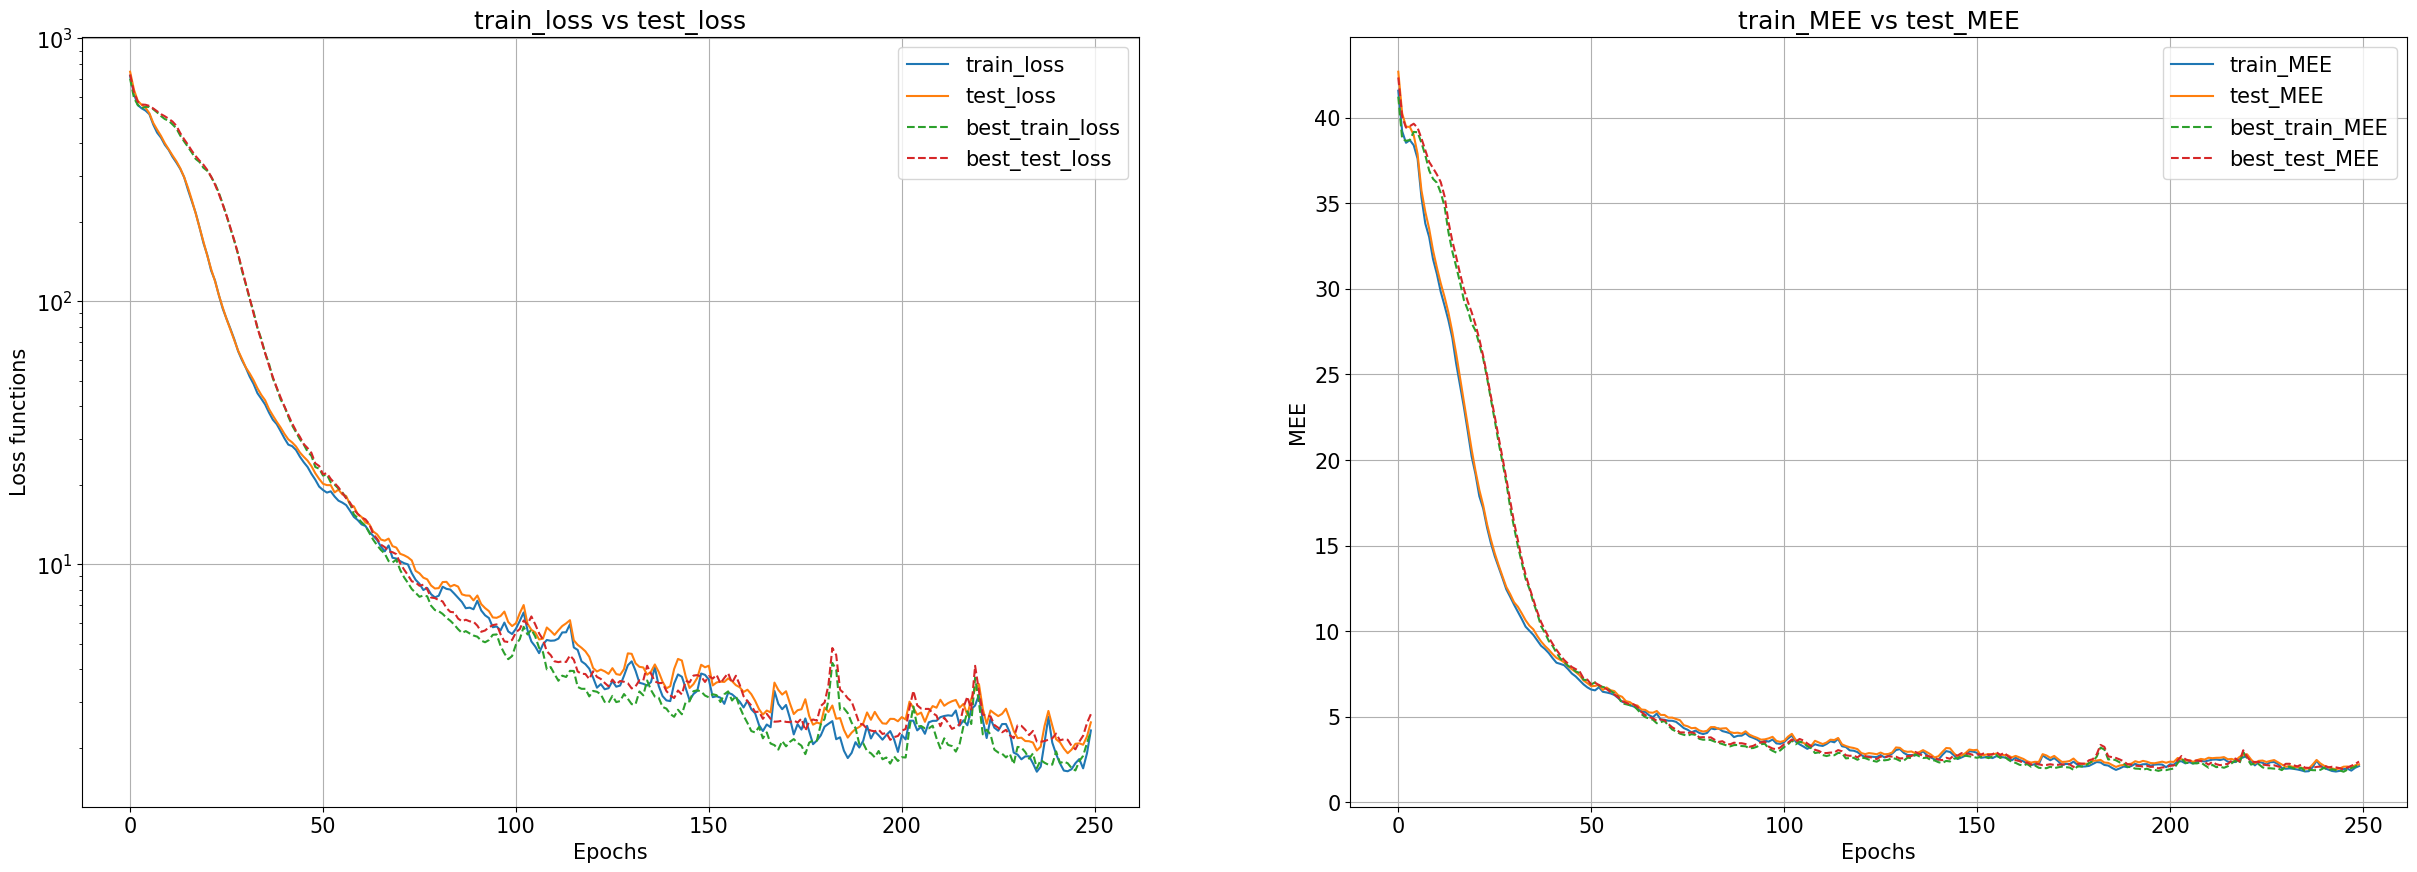

Epoch 0: train_loss: 7.331e+02, test_loss: 7.540e+02; train_MEE: 4.188e+01, test_MEE: 4.281e+01  lr : 0.1
Epoch 1: train_loss: 6.287e+02, test_loss: 6.389e+02; train_MEE: 3.969e+01, test_MEE: 4.024e+01  lr : 0.1
Epoch 2: train_loss: 5.680e+02, test_loss: 5.724e+02; train_MEE: 3.889e+01, test_MEE: 3.923e+01  lr : 0.1
Epoch 3: train_loss: 5.485e+02, test_loss: 5.593e+02; train_MEE: 3.899e+01, test_MEE: 3.949e+01  lr : 0.1
Epoch 4: train_loss: 5.514e+02, test_loss: 5.628e+02; train_MEE: 3.931e+01, test_MEE: 3.982e+01  lr : 0.1
Epoch 5: train_loss: 5.513e+02, test_loss: 5.616e+02; train_MEE: 3.928e+01, test_MEE: 3.974e+01  lr : 0.1
Epoch 6: train_loss: 5.447e+02, test_loss: 5.561e+02; train_MEE: 3.885e+01, test_MEE: 3.936e+01  lr : 0.1
Epoch 7: train_loss: 5.369e+02, test_loss: 5.538e+02; train_MEE: 3.829e+01, test_MEE: 3.901e+01  lr : 0.1
Epoch 8: train_loss: 5.487e+02, test_loss: 5.557e+02; train_MEE: 3.849e+01, test_MEE: 3.890e+01  lr : 0.1
Epoch 9: train_loss: 5.406e+02, test_loss: 5.5

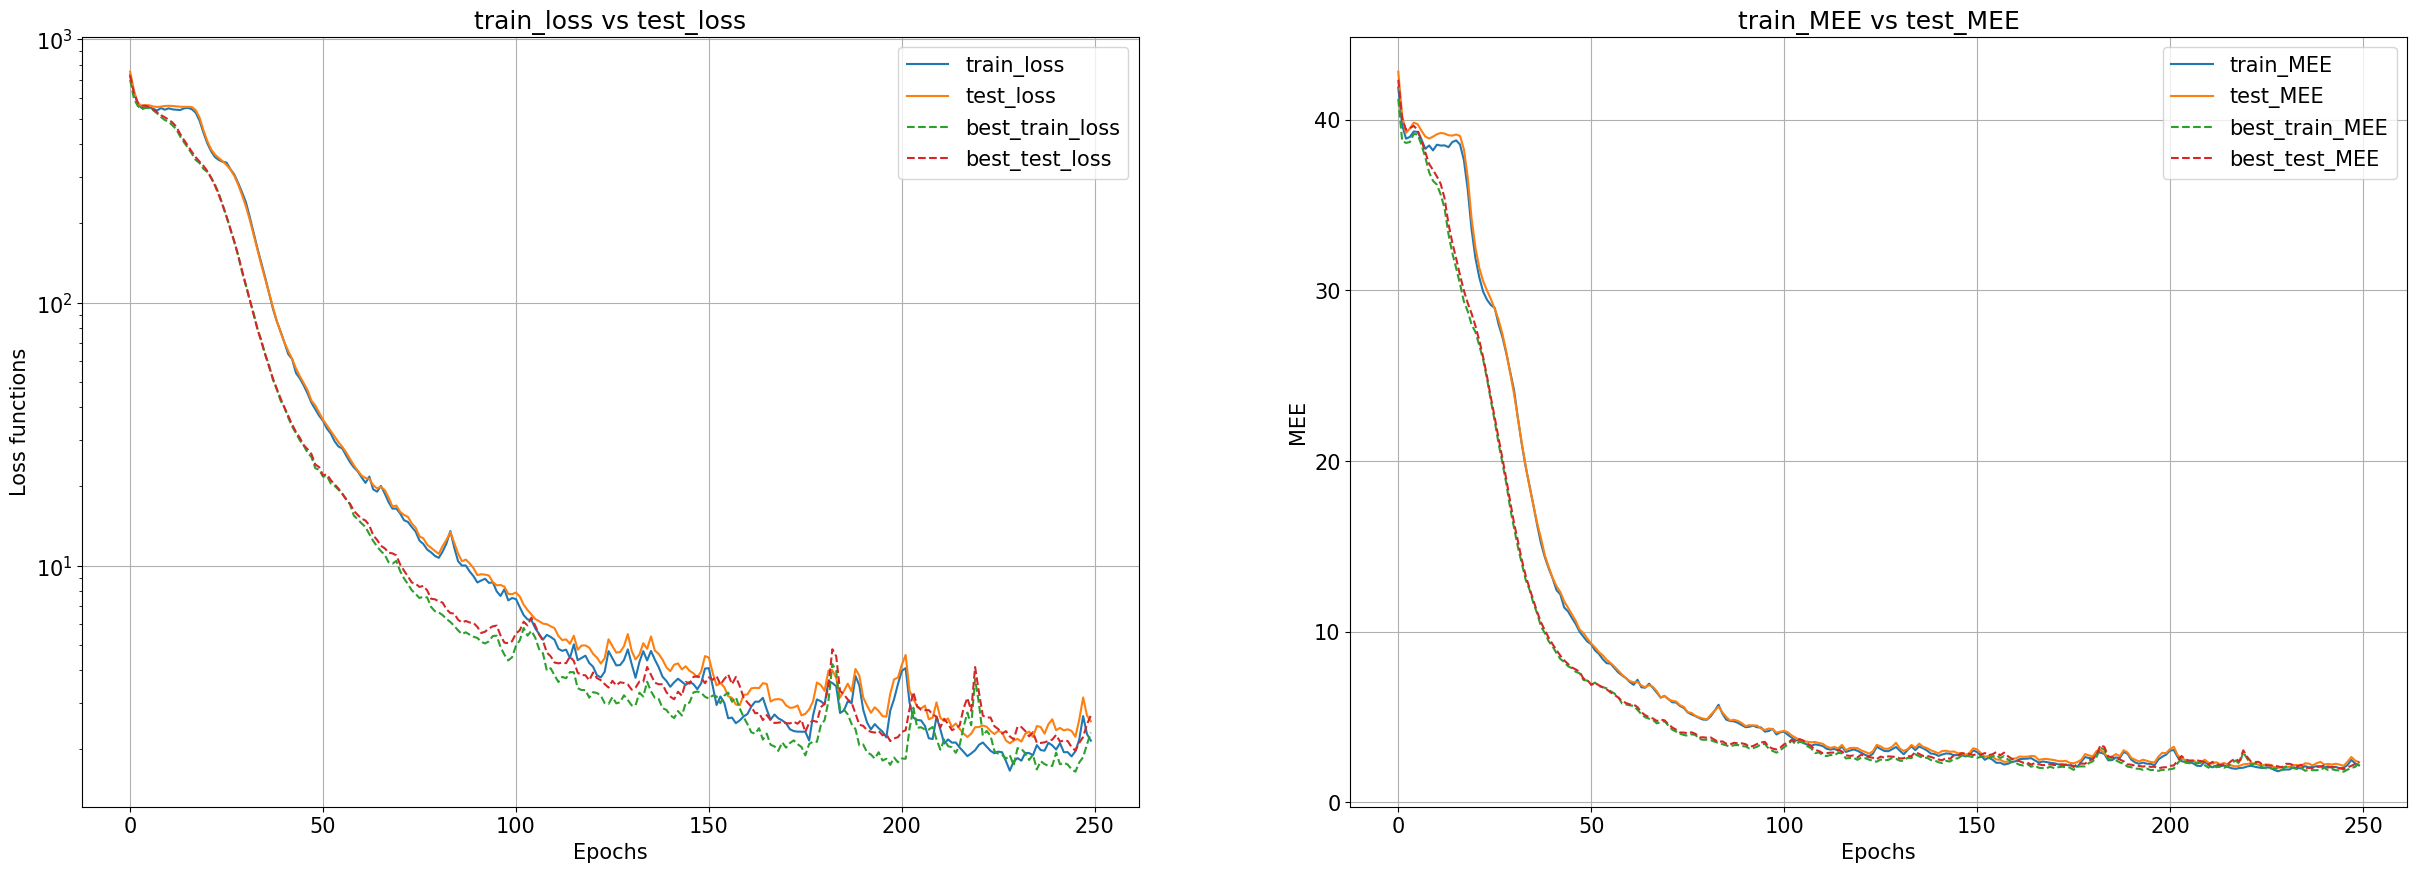

In [8]:
# Permorm retraining on the best {how_many} sets and print loss and MEE graphs.

retraining_epochs = 250
print_best = True # print the best results on all graphs

for i,p_comb in enumerate(p_best):

    best_comb = p_comb.copy()

    best_comb['epochs'] = retraining_epochs

    results = best_comb.pop('results')
    if best_comb['n_batch'] == 'batch':
        best_comb['n_batch'] = X_train.shape[1]
    elapsed_time = best_comb.pop('elapsed_time')
    if best_comb['scale_eta_batchsize'] == 'lin':
        best_comb['eta'] = best_comb['eta'] * best_comb['n_batch']
    if best_comb['scale_eta_batchsize'] == 'sqrt':
        best_comb['eta'] = best_comb['eta'] * np.sqrt(best_comb['n_batch'])
    best_comb.pop('scale_eta_batchsize')

    # ----------------------- MODEL ----------------------------
    
    input_layer = Input(X_train.shape[0])
    hidden_layer = Layer(input_layer, best_comb.pop('dim_hidden'), best_comb.pop('hidden_act_func'))
    o = 2
    while True:
        if f'dim_hidden{o}' in best_comb.keys():
            hidden_layer = Layer(hidden_layer, best_comb.pop(f'dim_hidden{o}'), best_comb.pop(f'hidden_act_func{o}'))
            o += 1
        else: break
    output_layer = Layer(hidden_layer, 3, best_comb.pop('output_act_func'))

    model = NeuralNetwork(input_layer, output_layer, best_comb.pop('loss'), metrics=[MEE])
    history = model.retrain(X_train, y_train.reshape((3,X_train.shape[1])), test_data = [X_test,y_test.reshape((3,X_test.shape[1]))], **best_comb)

    # ----------------------------------------------------------

    if i == 0:
        best_train_loss, best_test_loss = history['train_loss'], history['test_loss']
        best_train_MEE, best_test_MEE = history['train_MEE'], history['test_MEE']

    plt.figure(i, figsize=(30,10))
    
    plt.subplot(1,2,1)
    plt.plot(history['train_loss'],label='train_loss')
    plt.plot(history['test_loss'], label='test_loss')
    if (i > 0) and (print_best == True):
        plt.plot(best_train_loss,'--',label='best_train_loss')
        plt.plot(best_test_loss, '--', label='best_test_loss')
    plt.yscale('log')
    plt.xlabel('Epochs', size=15)
    plt.ylabel('Loss functions', size=15)
    plt.title('train_loss vs test_loss', size=18)
    plt.xticks(size=15)
    plt.yticks(size=15)
    plt.grid()
    plt.legend(fontsize=15)

    plt.subplot(1,2,2)
    plt.plot(history['train_MEE'],label='train_MEE')
    plt.plot(history['test_MEE'], label='test_MEE')
    if (i > 0) and (print_best == True):
        plt.plot(best_train_MEE,'--',label='best_train_MEE')
        plt.plot(best_test_MEE, '--', label='best_test_MEE')
    plt.xlabel('Epochs', size=15)
    plt.ylabel('MEE', size=15)
    plt.title('train_MEE vs test_MEE', size=18)
    plt.xticks(size=15)
    plt.yticks(size=15)
    plt.grid()
    plt.legend(fontsize=15)

    plt.show()

In [17]:
def function(seed):
    np.random.seed(seed)
    return np.random.uniform(0,10,10)

In [23]:
print(function(232323))

[5.58526844 2.1846418  6.79919952 7.11004665 7.14118482 0.5398932
 0.13095949 8.0790181  8.17264435 3.85478113]


: 